In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import norm
import seaborn as sns 

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, ShuffleSplit
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, KFold

# from yellowbrick.model_selection import LearningCurve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1. Data Preprocessing 

In [2]:
data = pd.read_csv('data/breast_cancer.csv')
data.head()

ID Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_worst  Texture_worst  Perimeter_worst  Area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   Smoothness_worst  Compactness_worst  Concavity_worst  Concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   Symmetry_worst  Fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
# the ID column does not provide any predictive information, so we'll drop it.
data = data.drop('ID', axis=1)

In [4]:
data.shape

(569, 31)

In [5]:
data.isnull().sum()

Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   Perimeter_mean           569 non-null    float64
 4   Area_mean                569 non-null    float64
 5   Smoothness_mean          569 non-null    float64
 6   Compactness_mean         569 non-null    float64
 7   Concavity_mean           569 non-null    float64
 8   Concave_points_mean      569 non-null    float64
 9   Symmetry_mean            569 non-null    float64
 10  Fractal_dimension_mean   569 non-null    float64
 11  Radius_se                569 non-null    float64
 12  Texture_se               569 non-null    float64
 13  Perimeter_se             569 non-null    float64
 14  Area_se                  5

In [7]:
data.describe()

Radius_mean  Texture_mean  Perimeter_mean    Area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       Symmetry_mean  Fractal_dimension_mean  ...  Radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       Texture_worst  Perimeter_worst   Area_worst  Smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       Compactness_worst  Concavity_worst  Concave_points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       Symmetry_worst  Fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
data['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
# the Diagnosis column contains categorical data (M = malignant, B = benign). We'll encode this column to numerical data.
le = LabelEncoder()
data['Diagnosis'] = le.fit_transform(data['Diagnosis'])
data['Diagnosis'].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

- Benign = 0 
- Malignant = 1 

In [10]:
data.to_csv('data/breast_cancer_cleaned.csv', index=False)

## 2. Exploratory Data Analysis (EDA)

In [11]:
data.describe()

Diagnosis  Radius_mean  Texture_mean  Perimeter_mean    Area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       Symmetry_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        Area_worst  Smoothness_worst  Compactness_worst  Concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       Concave_points_worst  Symmetry_worst  Fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [12]:
data.Diagnosis.unique()

array([1, 0])

In [13]:
diagnosis_grp = data.groupby('Diagnosis', axis=0)
pd.DataFrame(diagnosis_grp.size(), columns=['# of observations'])

# of observations
Diagnosis                   
0                        357
1                        212

### 2.1 Unimodal Data Visualizations

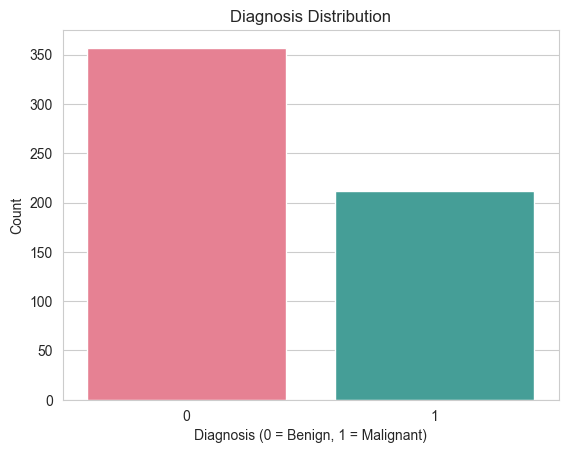

In [14]:
# The frequency of cancer diagnosis 
sns.countplot(x = "Diagnosis", data = data, palette="husl")
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

### 2.1.1 Breaking Features into Groups (_mean, _se, _worst)

The dataset contains three groups of features, each representing different characteristics of the tumor:
- _mean: Average values of tumor features.
- _se: Standard error, which reflects the variabilit in the features.
- _worst: Largest observed values (worst-case scenario) for each tumor feature.

Breaking the features into these groups allows us to:
1. Understand the distinct aspects of the tumor's characteristics
2. Visualize patterns within each group
3. Compare feature importance by group
4. Detect redundancy 


In [15]:
data_mean = data.iloc[:, 0:11]
data_se = data.iloc[:,np.r_[0, 11:21]]
data_worst = data.iloc[:,np.r_[0, 21:31]]

print('mean clumns: \n', data_mean.columns)
print('se columns: \n', data_se.columns)
print('worst columns: \n', data_worst.columns)

mean clumns: 
 Index(['Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean',
       'Area_mean', 'Smoothness_mean', 'Compactness_mean', 'Concavity_mean',
       'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean'],
      dtype='object')
se columns: 
 Index(['Diagnosis', 'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se',
       'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se',
       'Symmetry_se', 'Fractal_dimension_se'],
      dtype='object')
worst columns: 
 Index(['Diagnosis', 'Radius_worst', 'Texture_worst', 'Perimeter_worst',
       'Area_worst', 'Smoothness_worst', 'Compactness_worst',
       'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst',
       'Fractal_dimension_worst'],
      dtype='object')


### 2.1.2 Feature Comparisons of _mean 

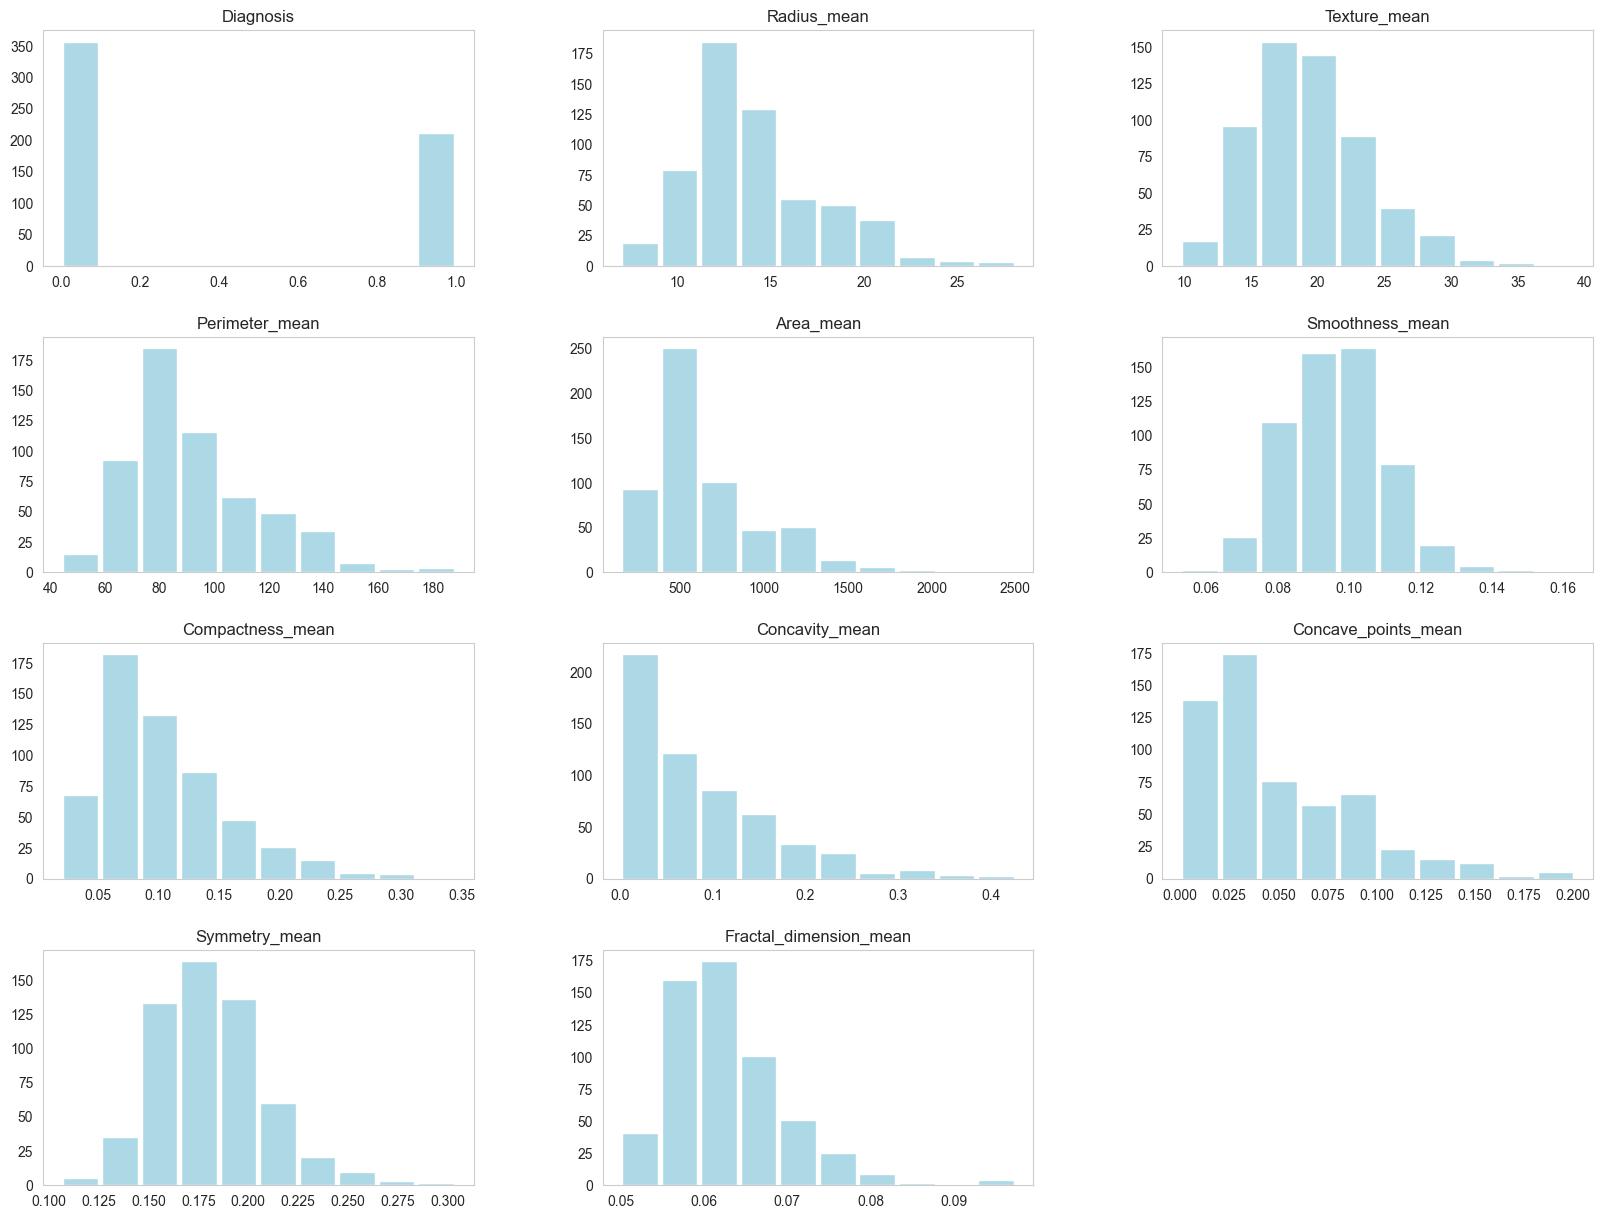

In [16]:
hist_mean = data_mean.hist(bins=10, figsize=(20, 15), grid=False, color='lightblue', zorder=2, rwidth=0.9)

> - **Radius_mean, Perimeter_mean, and Area_mean**, exhibit skewed distributions, indicating the need for transformation (e.g., normalization or scaling) before training.

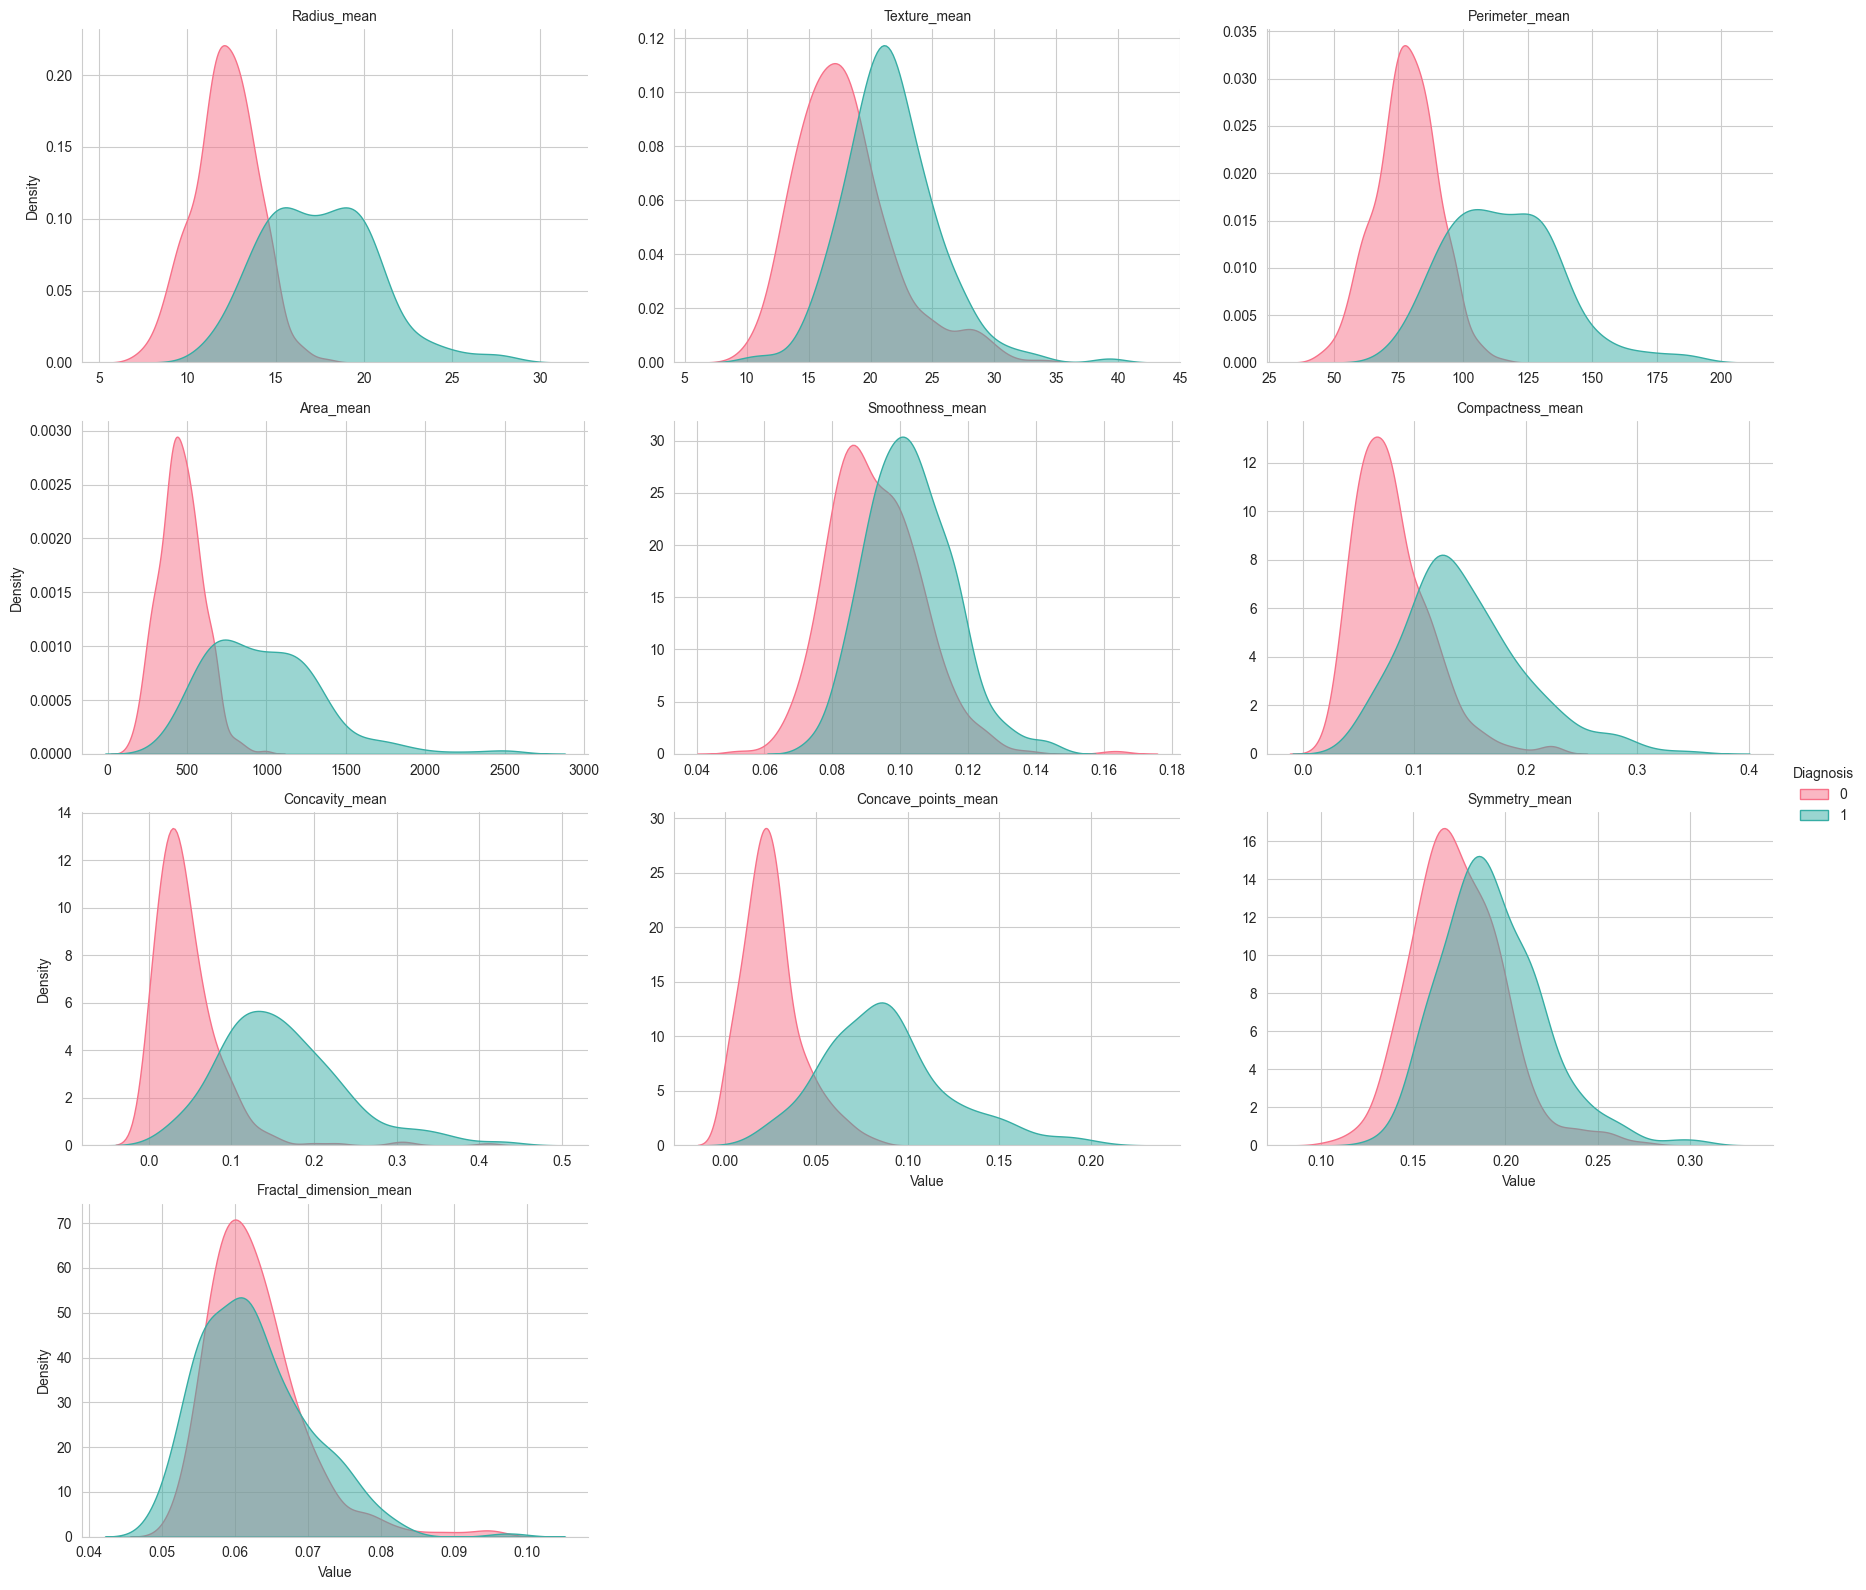

In [17]:
mean_data_melted = data_mean.melt(id_vars='Diagnosis', var_name='Feature', value_name='Value')

mean_density = sns.FacetGrid(mean_data_melted, hue='Diagnosis', col='Feature', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5, palette='husl')
mean_density.map(sns.kdeplot, 'Value', fill=True, common_norm=False, alpha=0.5)

mean_density.add_legend(title='Diagnosis')
mean_density.set_titles('{col_name}')
mean_density.set_axis_labels('Value', 'Density')

> - **Radius_mean, Perimeter_mean, and Area_mean** show significant separation, with malignant cases having higher values.
>
> - **Concavity_mean and Concave_points_mean** highlight distinct separations, making them potentially important predictors.

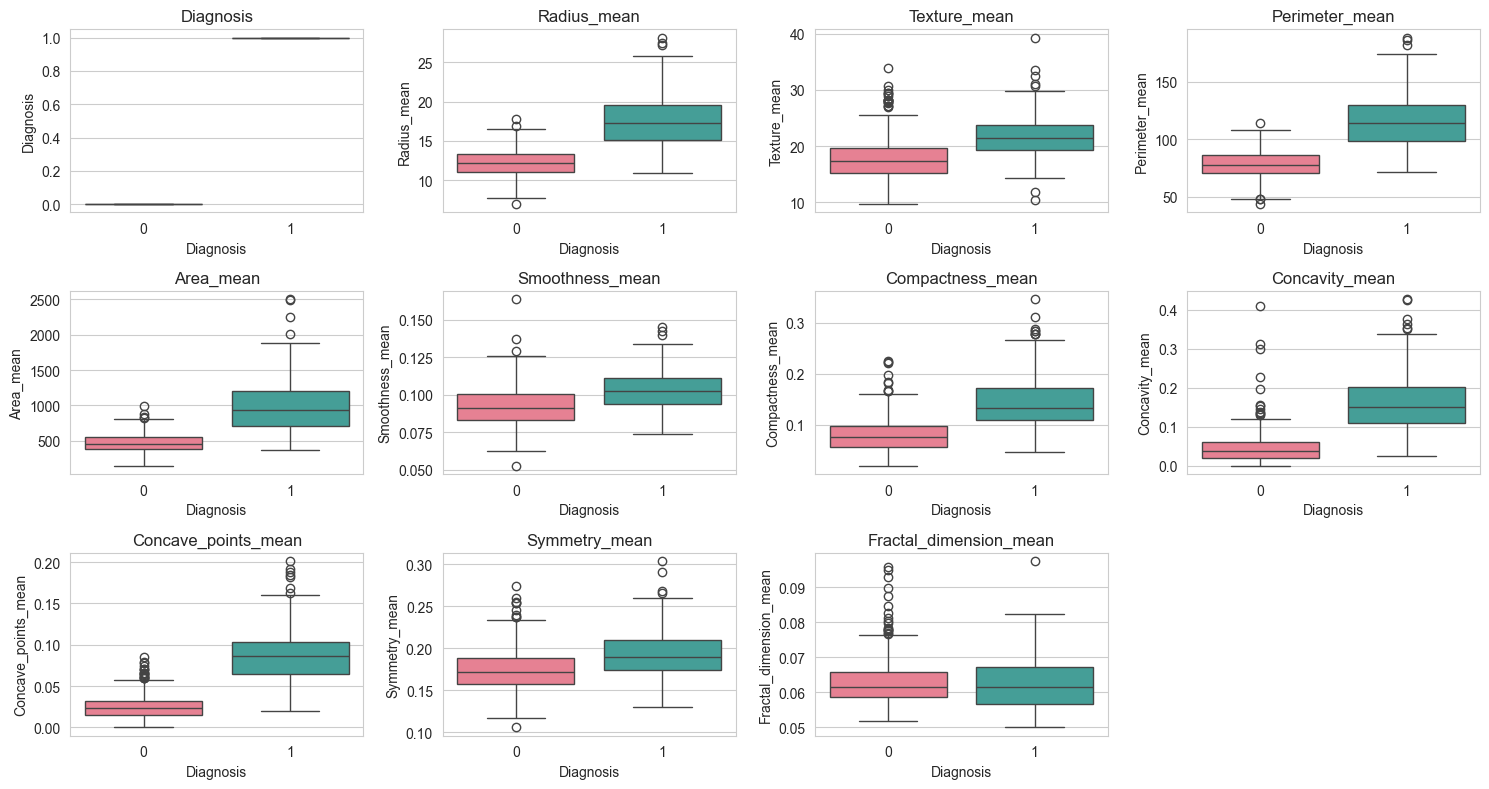

In [18]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(data_mean, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Diagnosis', y=feature, data=data_mean, palette='husl')
    plt.title(feature)

plt.tight_layout()
plt.show()

> - **Radius_mean, Perimeter_mean, Area_mean, and Concave_points_mean** show distinct differences between benign and malignant tumors. Malignant tumors tend to have higher values for these features.
>
> - **Smoothness_mean, Symmetry_mean, and Fractal_dimension_mean** show overlapping distributions between the two diagnoses. These features might have less discriminatory power.

### 2.1.3 Feature Comparisons of _se 

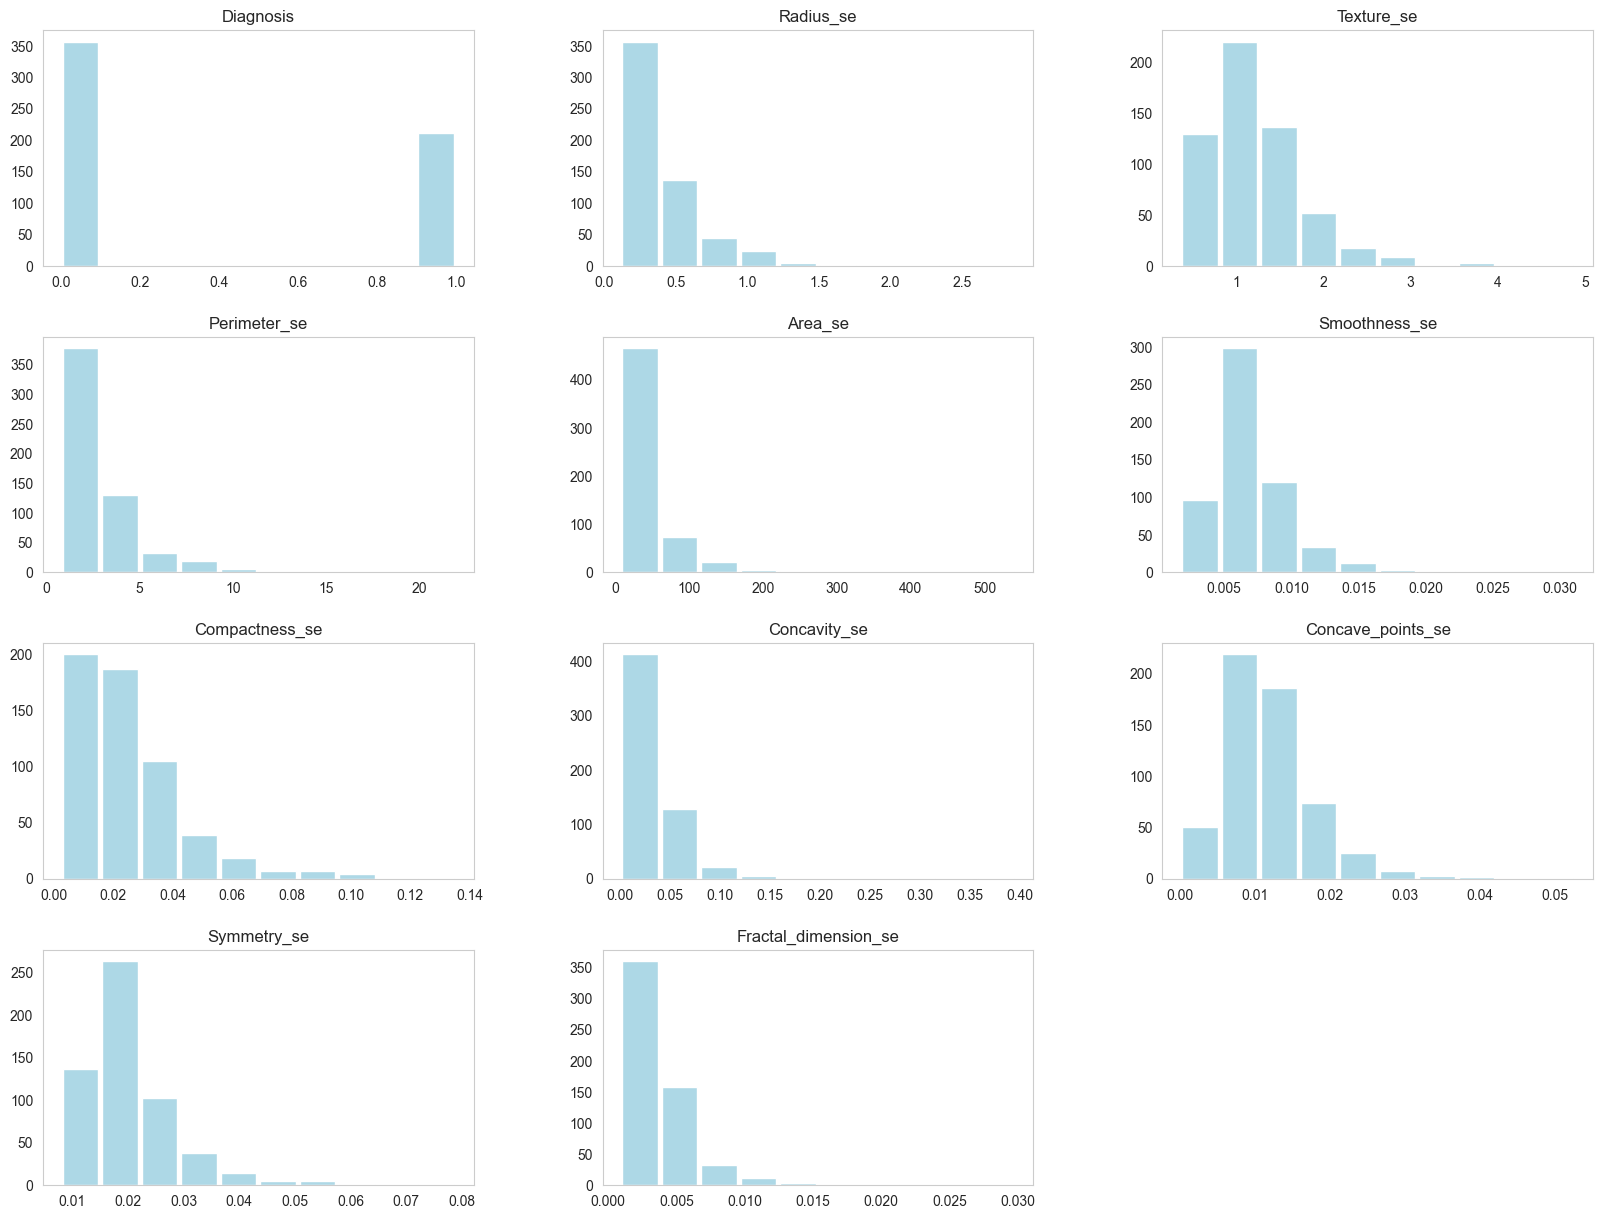

In [19]:
hist_se = data_se.hist(bins = 10, figsize=(20, 15), grid=False, color='lightblue', zorder=2, rwidth=0.9)

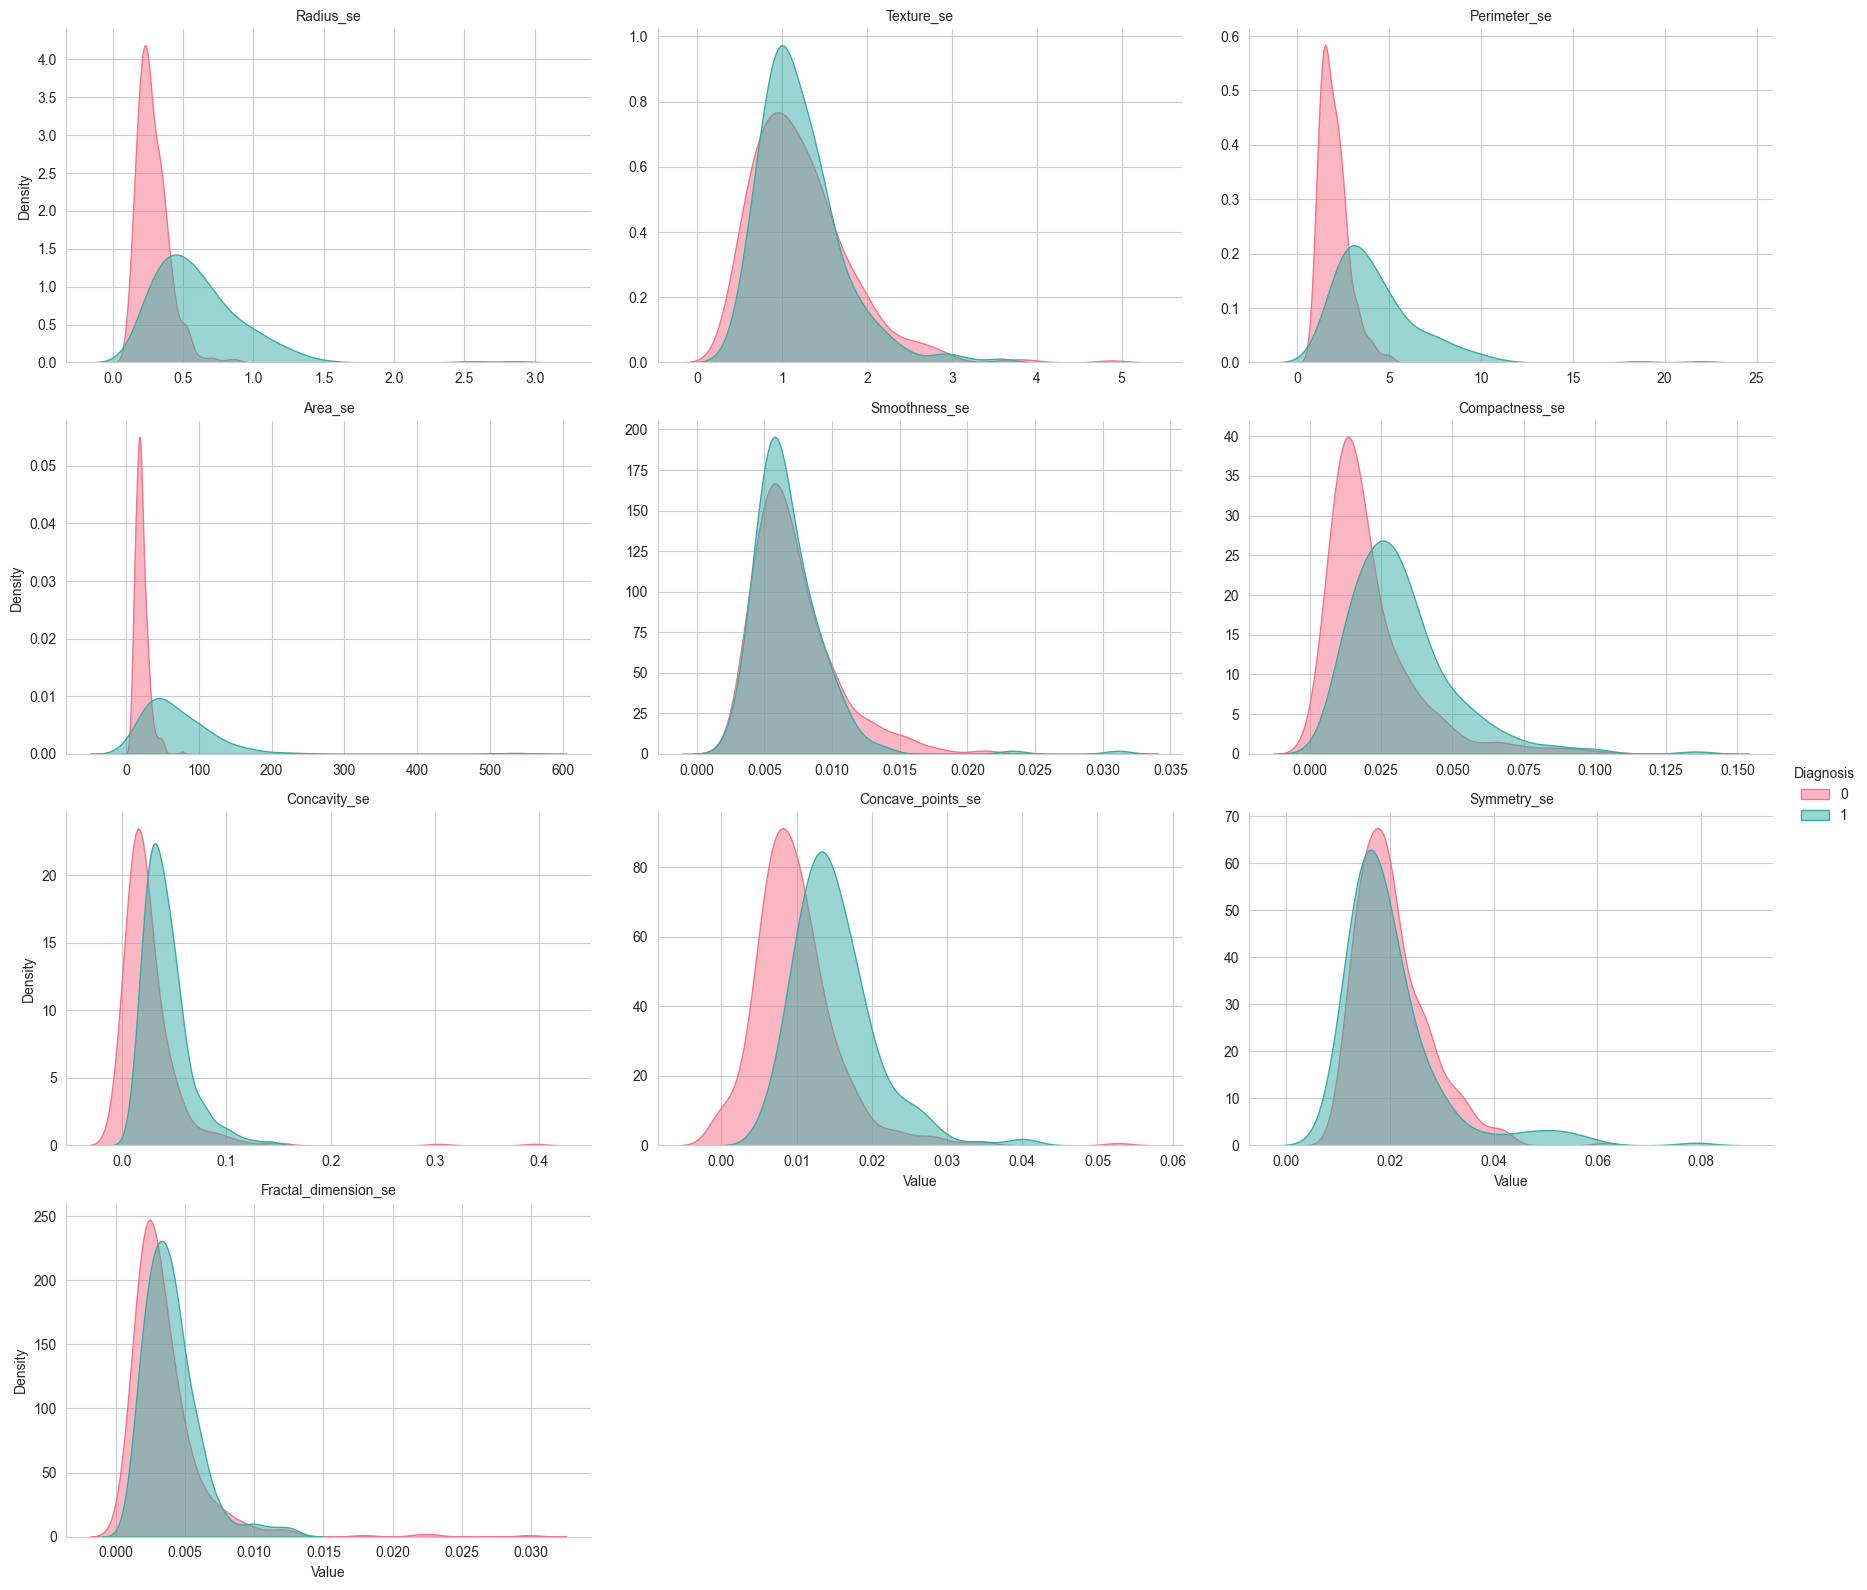

In [20]:
se_data_melted = data_se.melt(id_vars='Diagnosis', var_name='Feature', value_name='Value')
se_density = sns.FacetGrid(se_data_melted, hue='Diagnosis', col='Feature', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5, palette='husl')
se_density.map(sns.kdeplot, 'Value', fill=True, common_norm=False, alpha=0.5)
se_density.add_legend(title='Diagnosis')
se_density.set_titles('{col_name}')
se_density.set_axis_labels('Value', 'Density')

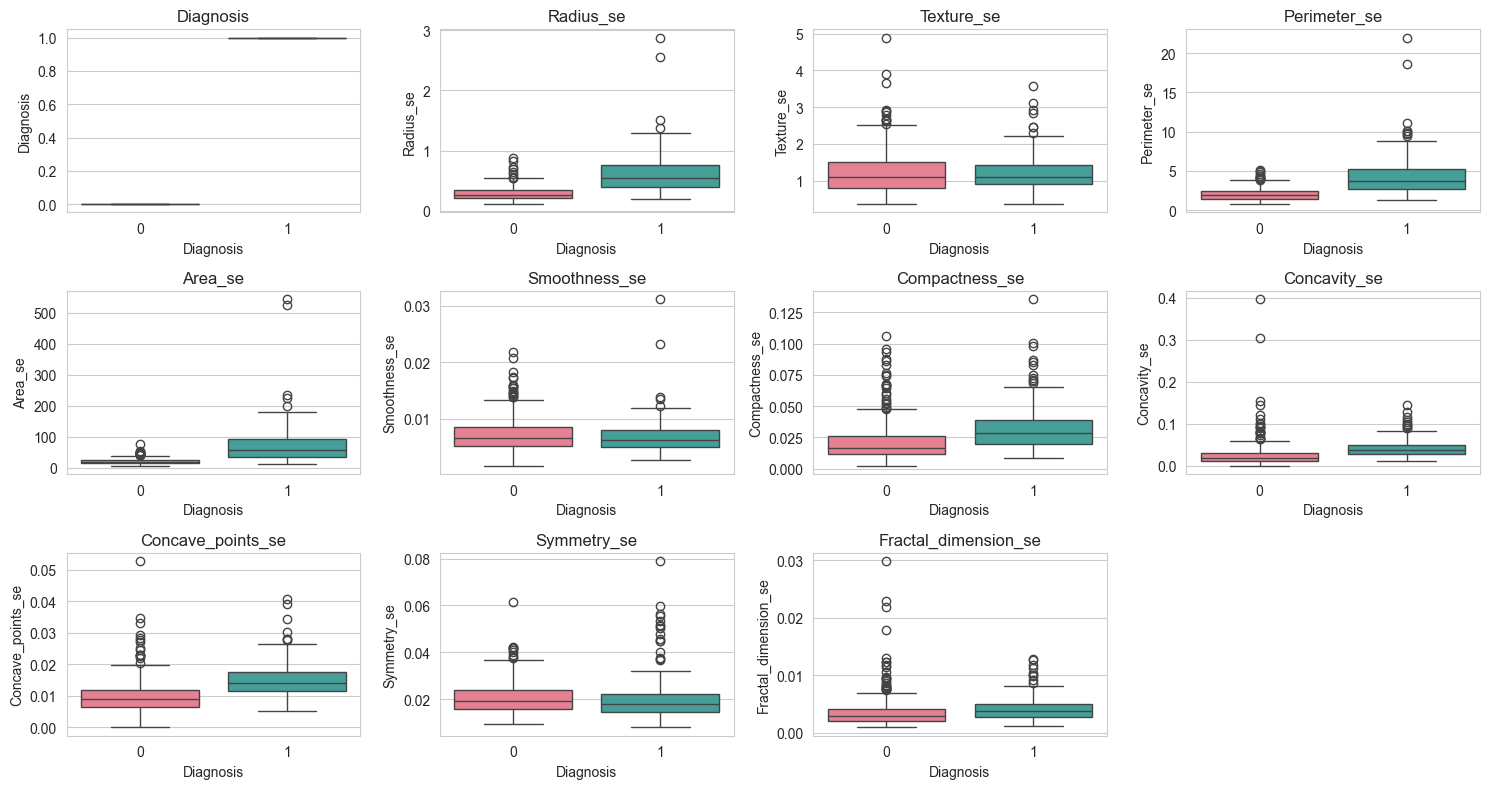

In [21]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(data_se, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Diagnosis', y=feature, data=data_se, palette='husl')
    plt.title(feature)

plt.tight_layout()
plt.show()

> - **Area_se, Radius_se, Perimeter_se and Concave_points_se** show higher variance, likely representing extreme cases 

### 2.1.4 Feature Comparisons of _worst 

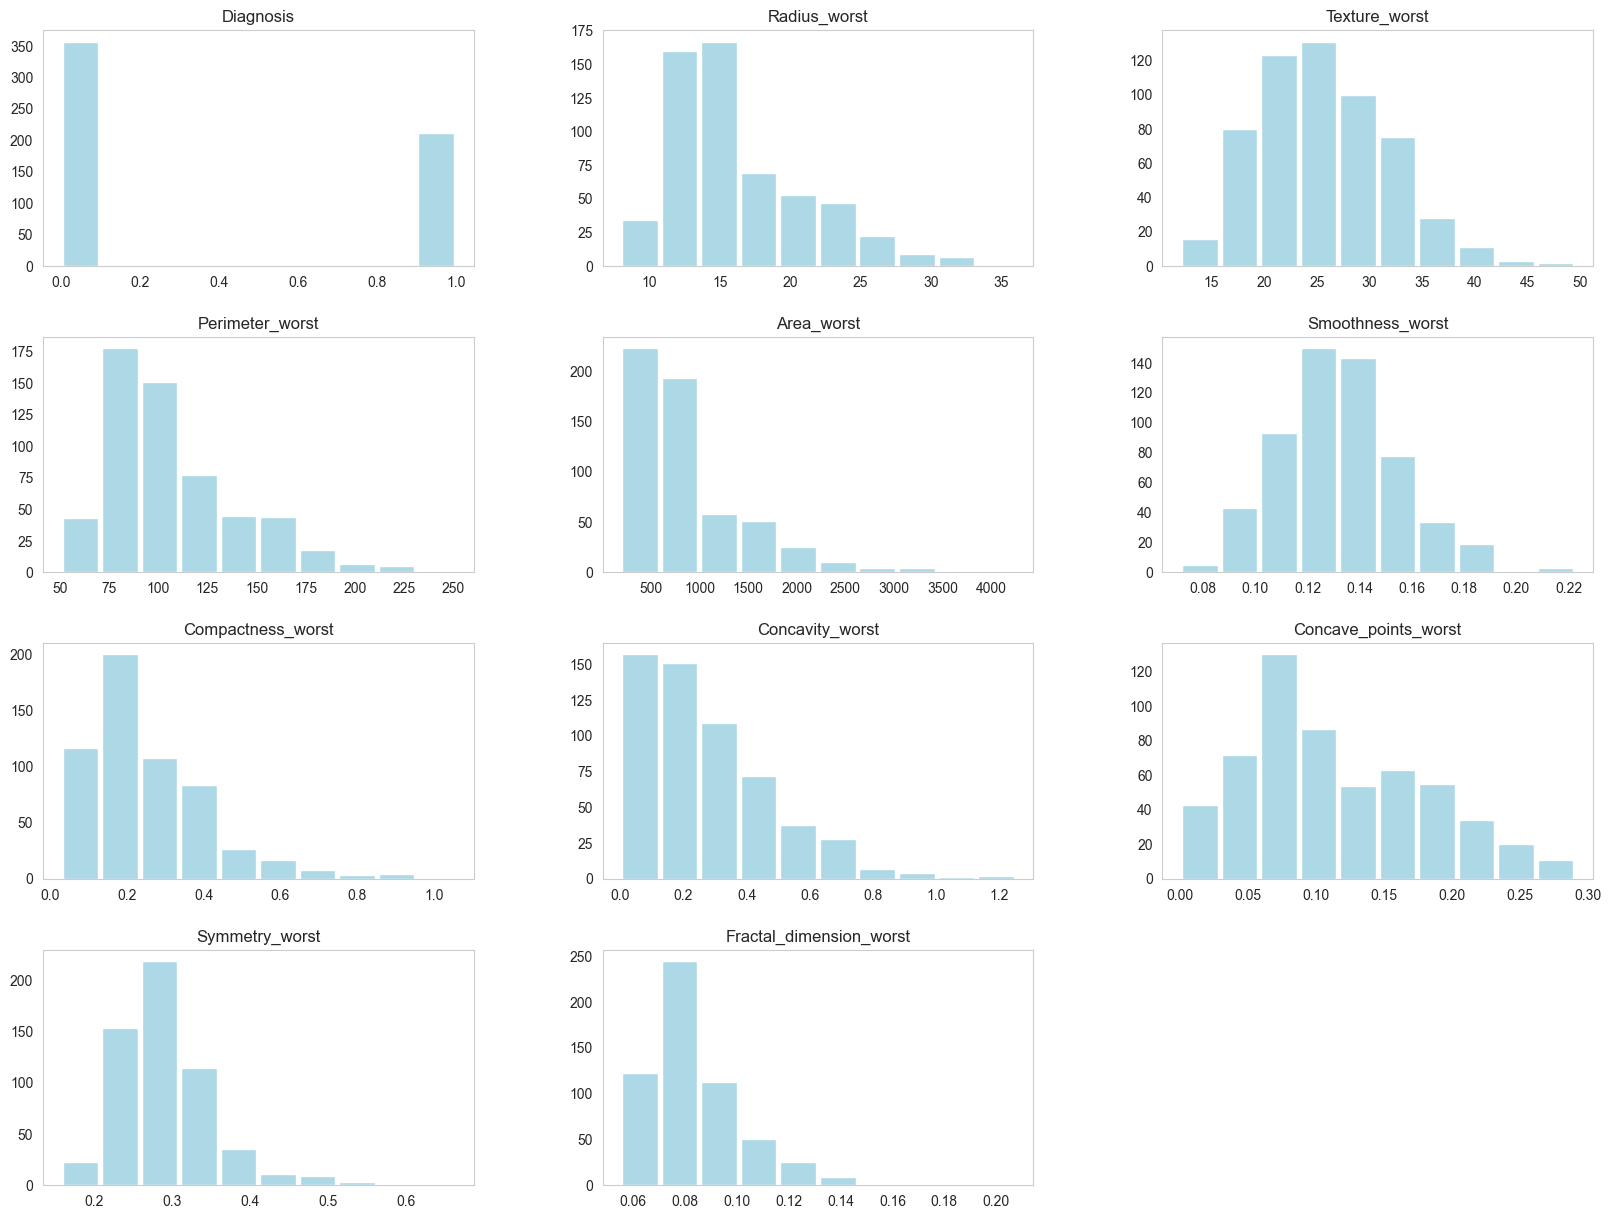

In [22]:
hist_worst = data_worst.hist(bins=10, figsize=(20, 15), grid=False, color='lightblue', zorder=2, rwidth=0.9)

> - **Radius_worst, Perimeter_worst, and Area_worst** show a  clear right-skewed distribution, with malignant tumors having significantly higher values.
>
> - As seen in _mean and _se, **Fractal_dimension_worst**  shows minimal variability and and high overlap across the two classes 

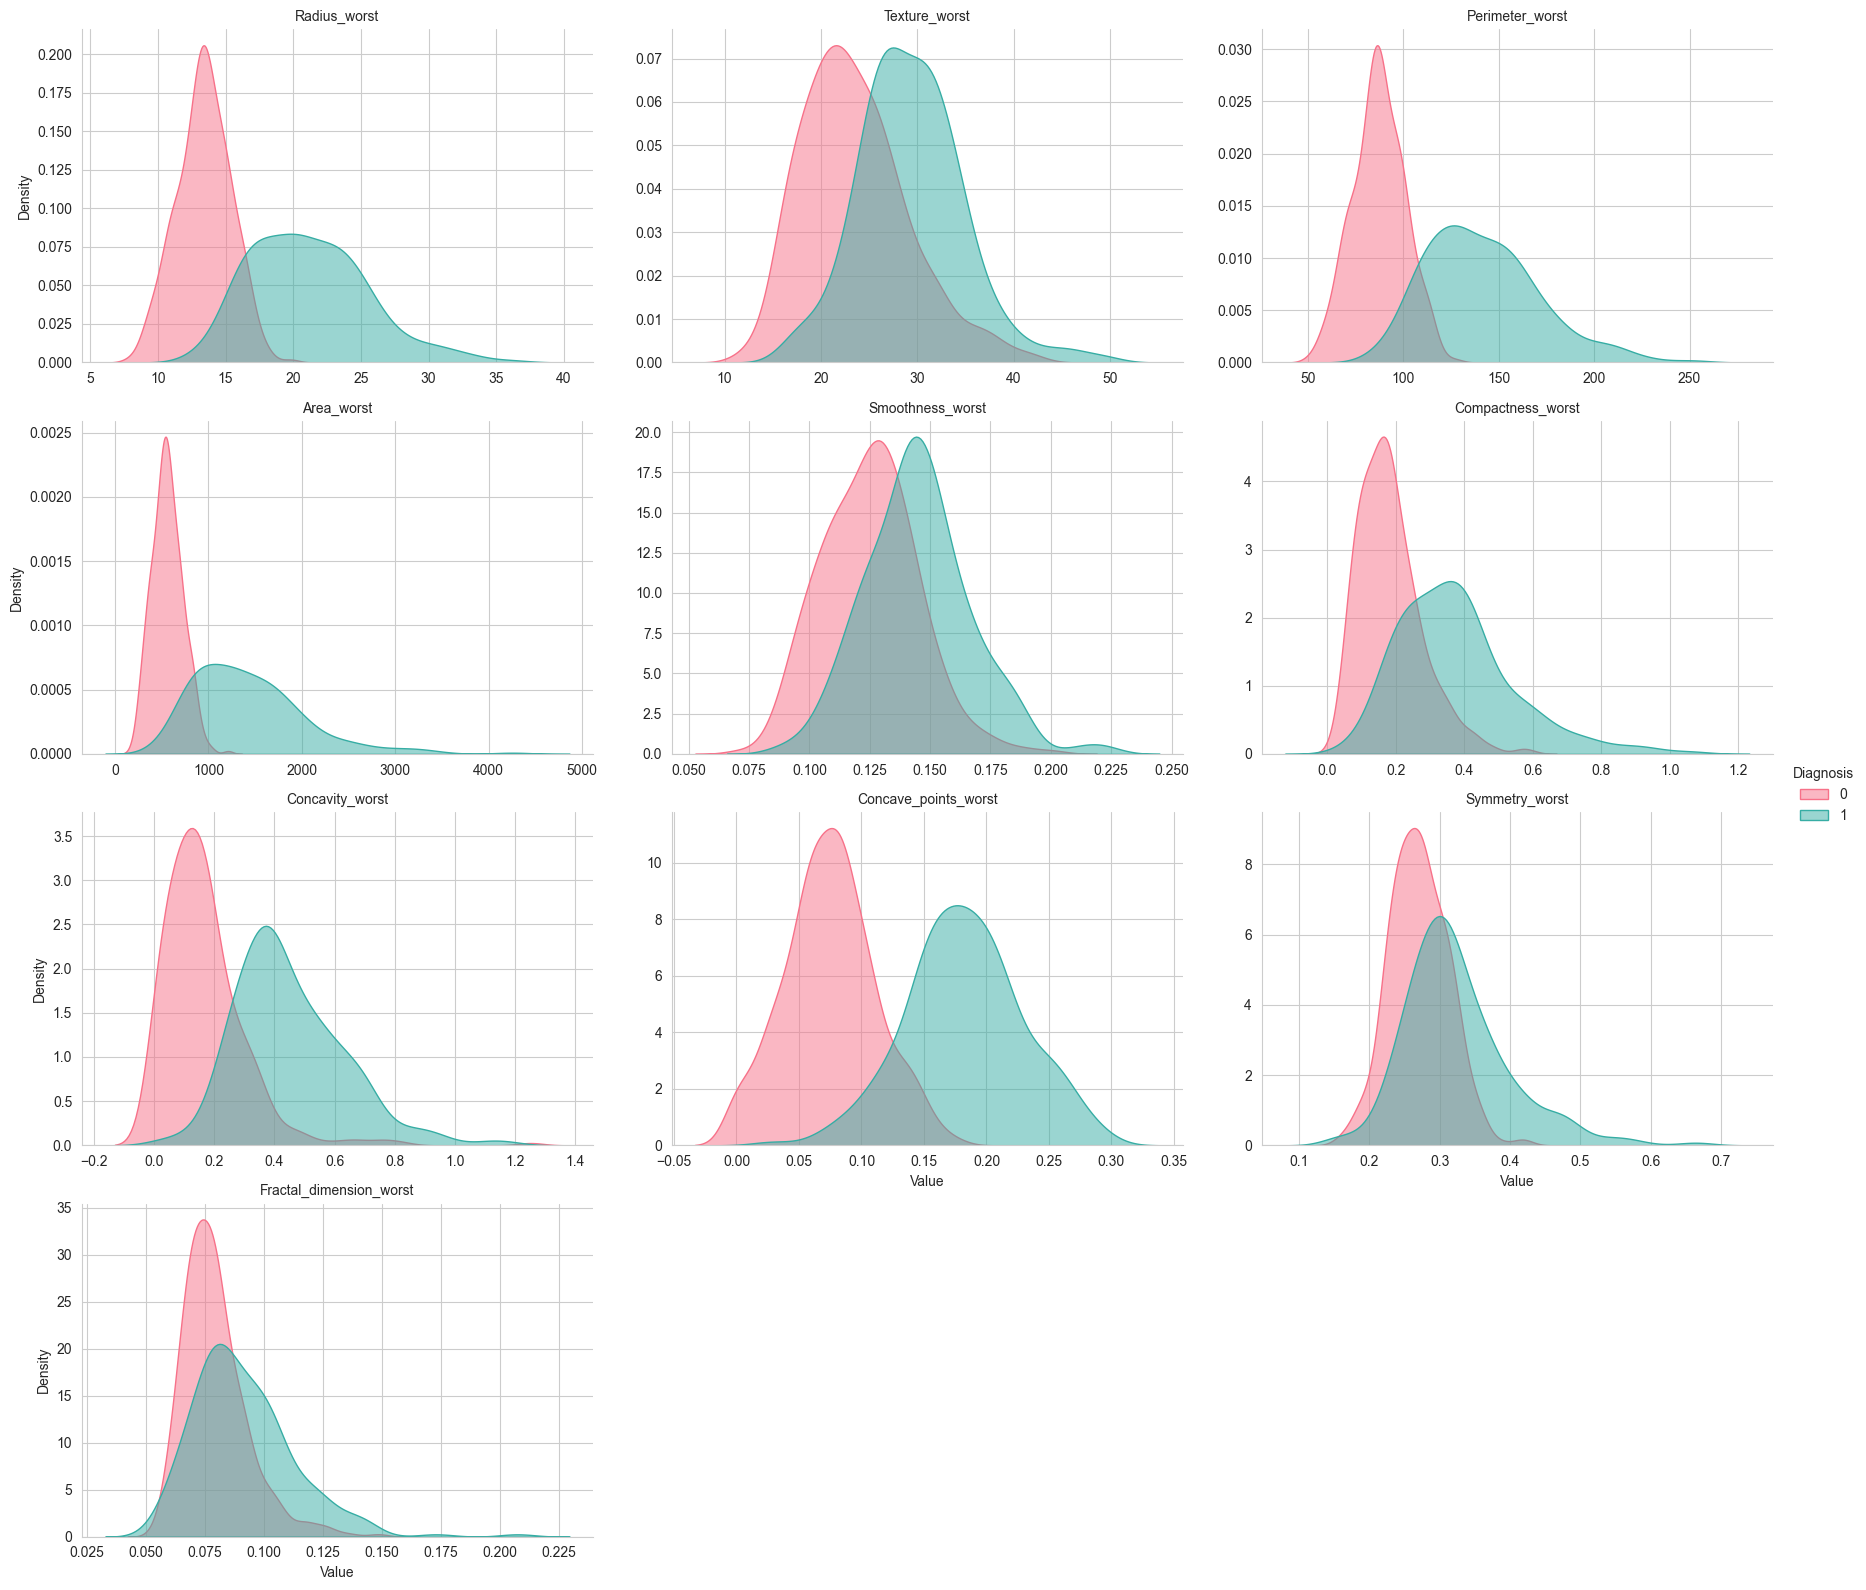

In [23]:
worst_data_melted = data_worst.melt(id_vars='Diagnosis', var_name='Feature', value_name='Value')
worst_density = sns.FacetGrid(worst_data_melted, hue='Diagnosis', col='Feature', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5, palette='husl')
worst_density.map(sns.kdeplot, 'Value', fill=True, common_norm=False, alpha=0.5)
worst_density.add_legend(title='Diagnosis')
worst_density.set_titles('{col_name}')
worst_density.set_axis_labels('Value', 'Density')


> - **Radius_worst, Perimeter_worst, Area_worst, Concavity_worst and Concave_points_worst** demonstrate strong separation, with malignant tumors exhibiting notably higher values.

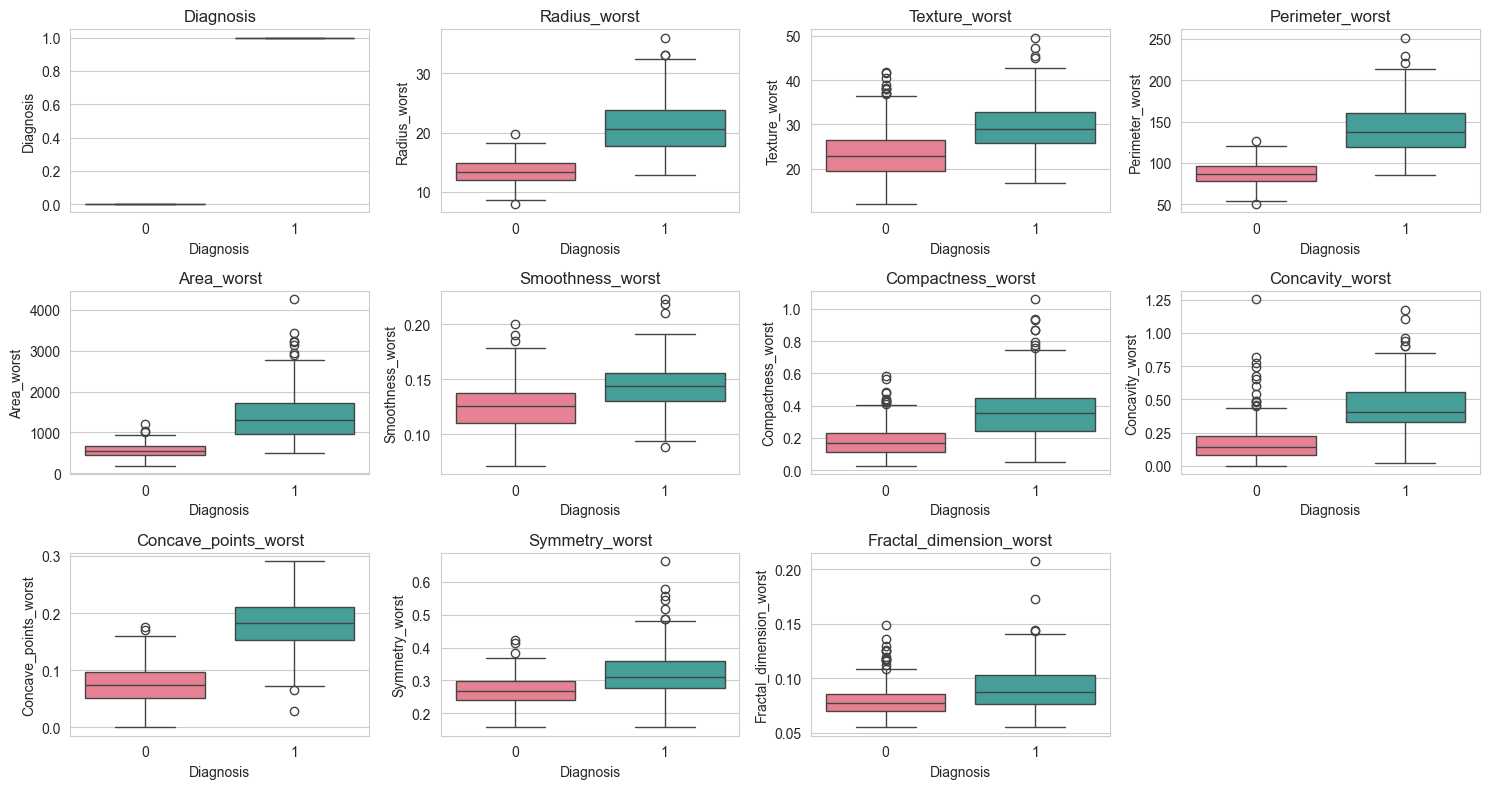

In [24]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(data_worst, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Diagnosis', y=feature, data=data_worst, palette='husl')
    plt.title(feature)

plt.tight_layout()
plt.show()

> - Malignant tumors consistently have higher medians for features like **Radius_worst, Area_worst, and Concavity_worst**
>
> - Malignant tumors exhibit larger interquartile ranges for most features, indicating greater variability within the class.
>
> - Outliers are more frequent in malignant cases, particularly for **Area_worst and Concavity_worst**, suggesting extreme values in these cases.

*Features such as **Perimeter, Radius, Area, Concavity, and Compactness** exhibit a right-skewed distribution, where values are concentrated at the lower end with a long tail. This suggests they may follow an **exponential distribution.***

*Features like **Texture, Smoothness, and Symmetry** display a bell-shaped curve in their histograms and density plots, indicating they may follow a **Gaussian (or near-Gaussian) distribution.***

### 2.2 Multimodal Data Visualizations

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

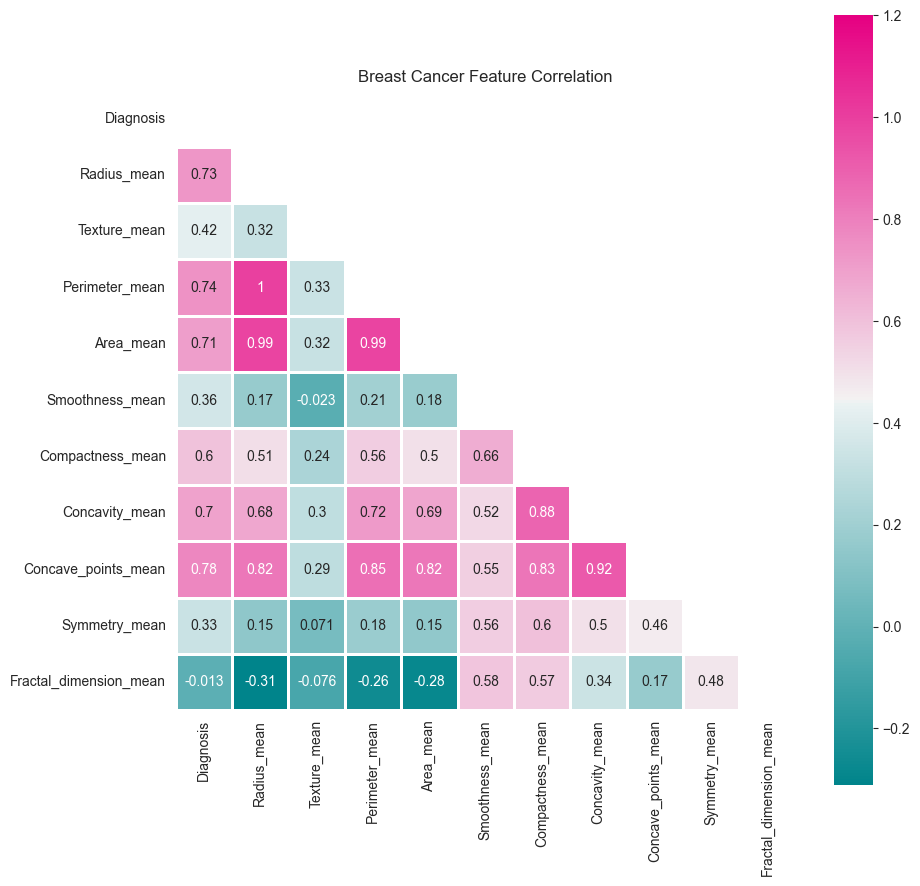

In [25]:
sns.set_style('white')
corr = data_mean.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Breast Cancer Feature Correlation')

cmap = sns.diverging_palette(200, 350, s=100, as_cmap=True)

sns.heatmap(corr, vmax=1.2, square=True, cmap=cmap, mask=mask, annot=True, fmt='.2g', ax=ax, linewidths=2)

> - **Radius_mean, Perimeter_mean, Area_mean , Concavity_mean, and Concave_points_mean**  have strong positive correlations with the **Diagnosis**. These features are likely to play a significant role in distinguishing malignant from benign tumors.
>
> - Strong multicollinearity is observed between **Perimeter_mean, Radius_mean, and Area_mean; and Concave_points_mean and Concavity_mean**, suggesting redundancy and can effect performance. To address this, PCA analysis will be conducted. 


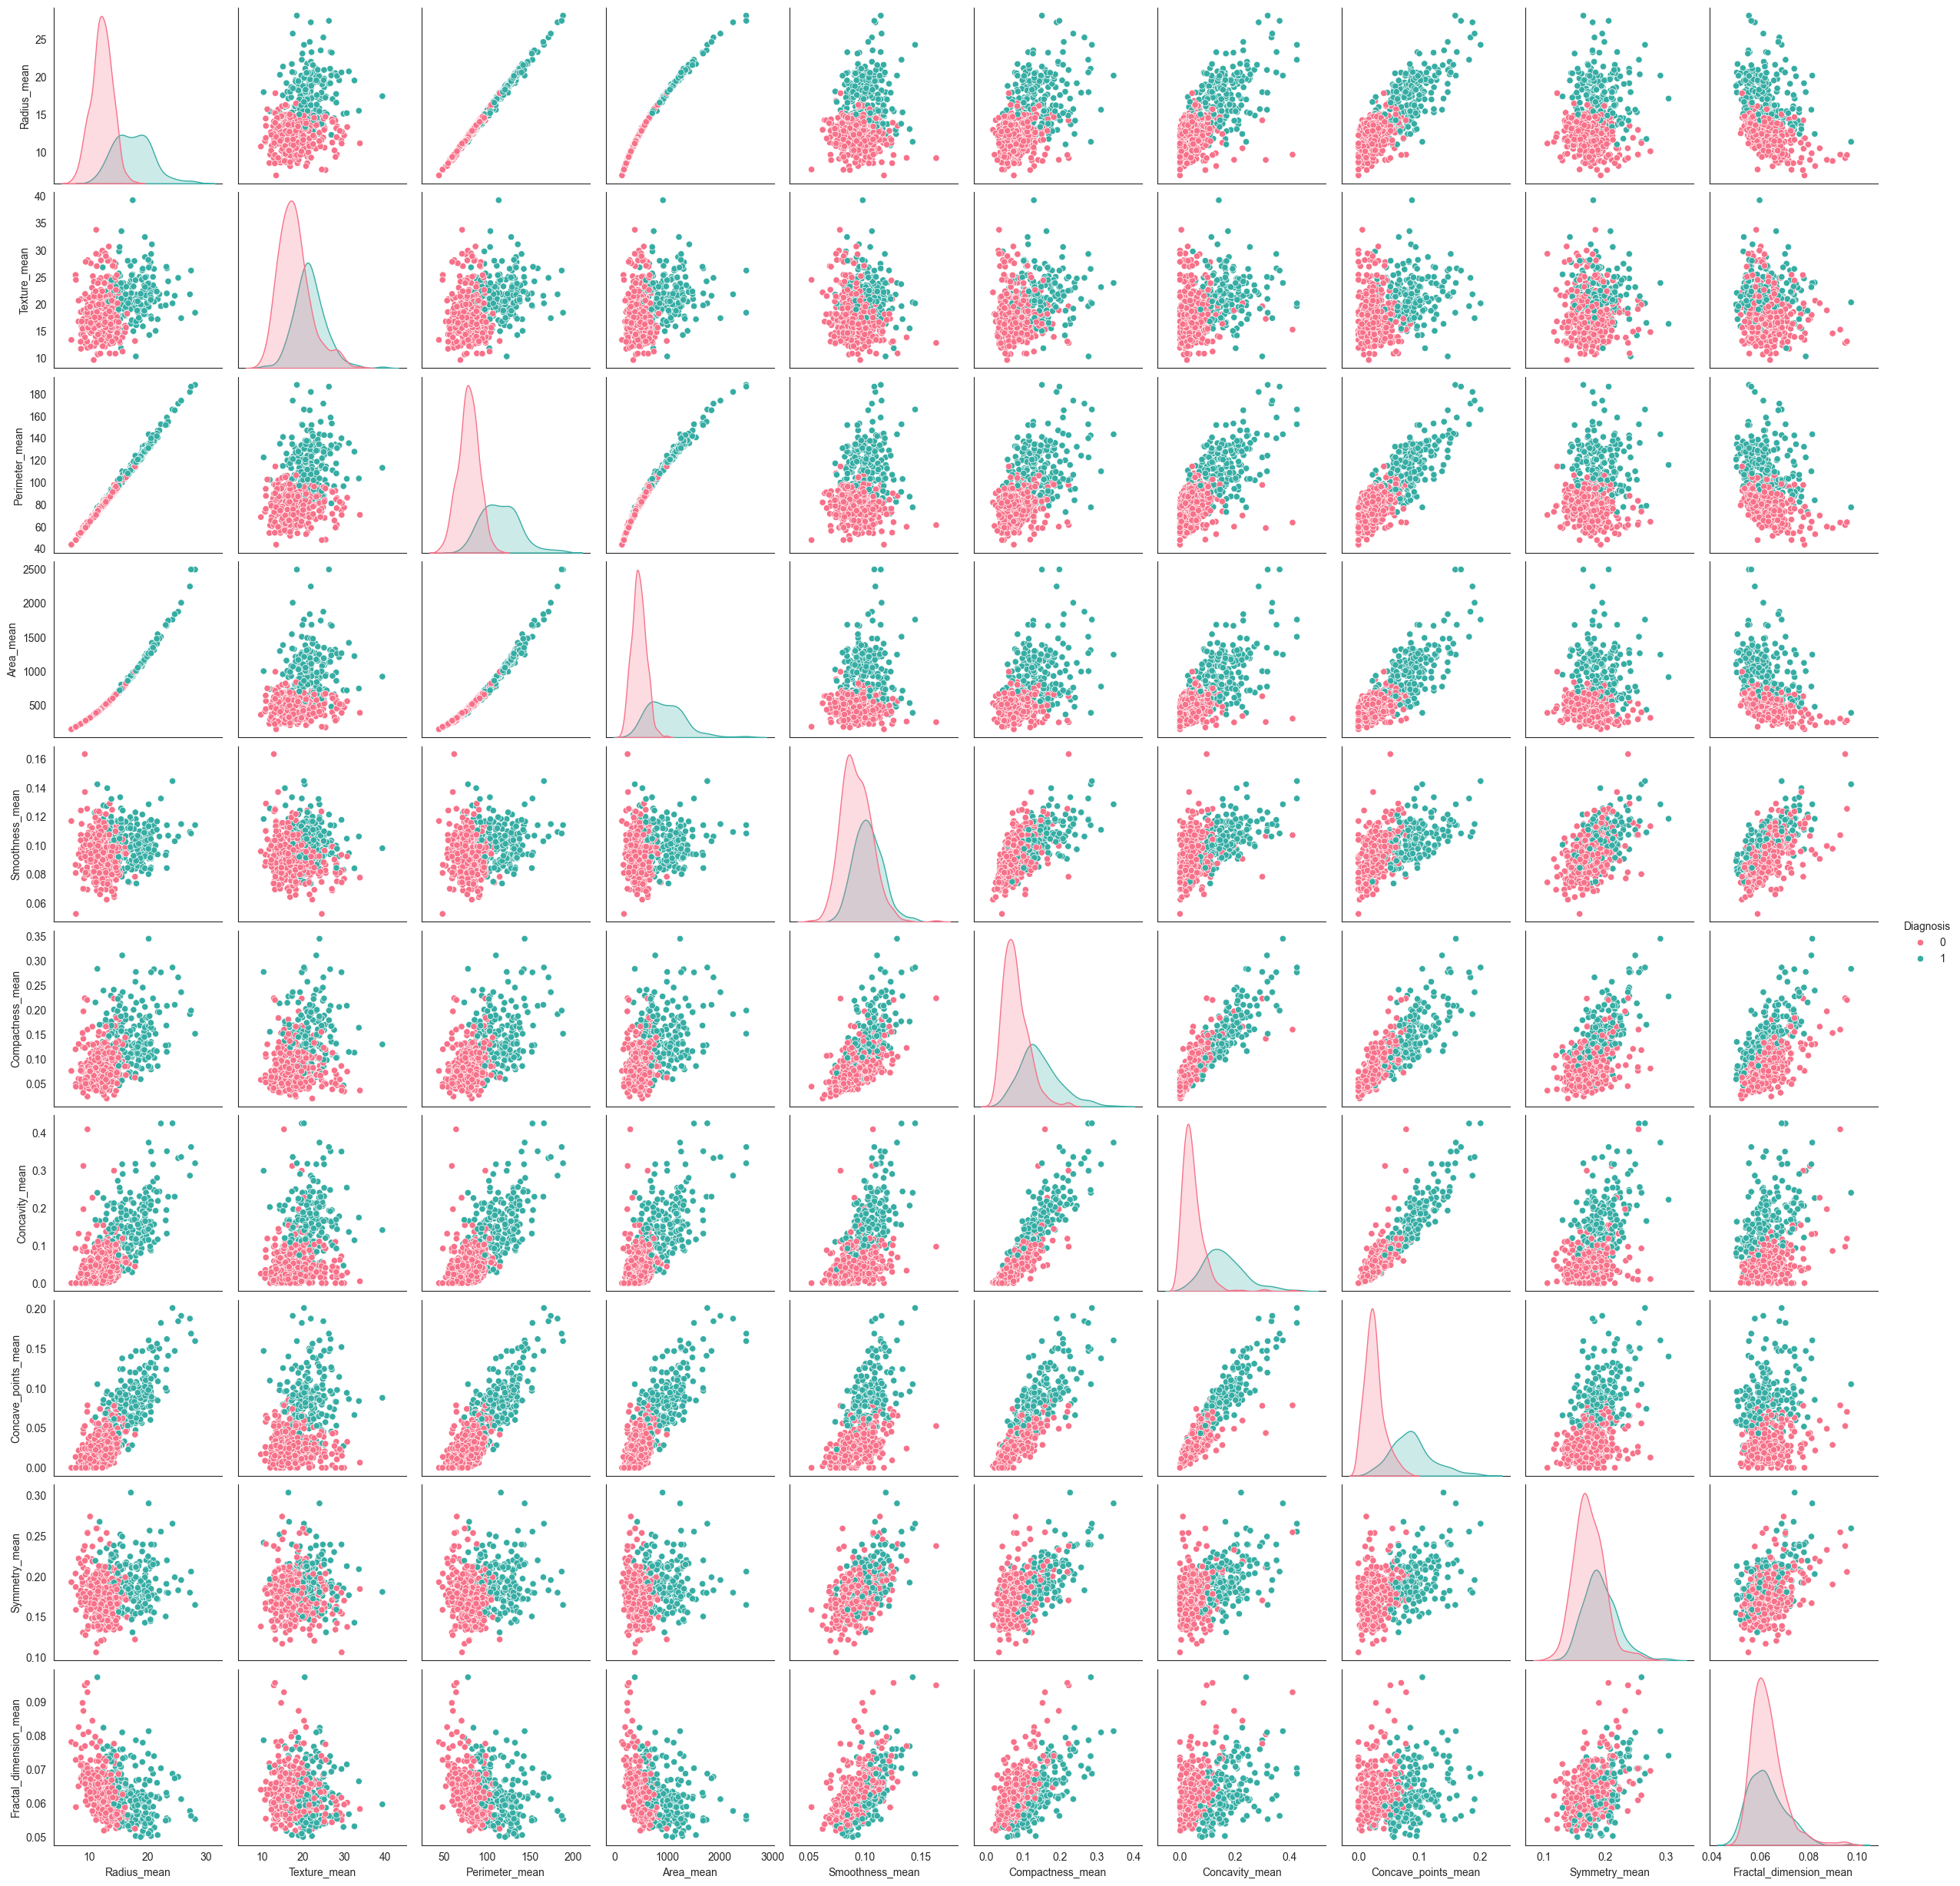

In [26]:
sns.pairplot(data_mean, hue='Diagnosis', palette="husl")
plt.show()

> - **Radius_mean, Perimeter_mean, Area_mean, Concave_points_mean and Concavity_mean** exhibit strong positive linear relationships, and therfore can be used for classification.
>
> - **Radius_mean, Concavity_mean, and Concave_points_mean** show clear clustering indicatng their importance in distinguishing between the two classes. 
>
> - **Fractal_dimension_mean, Smoothness_mean and Symmetry_mean** have weak to no relations with most features.

### 2.2.1 Positively Correlated Features

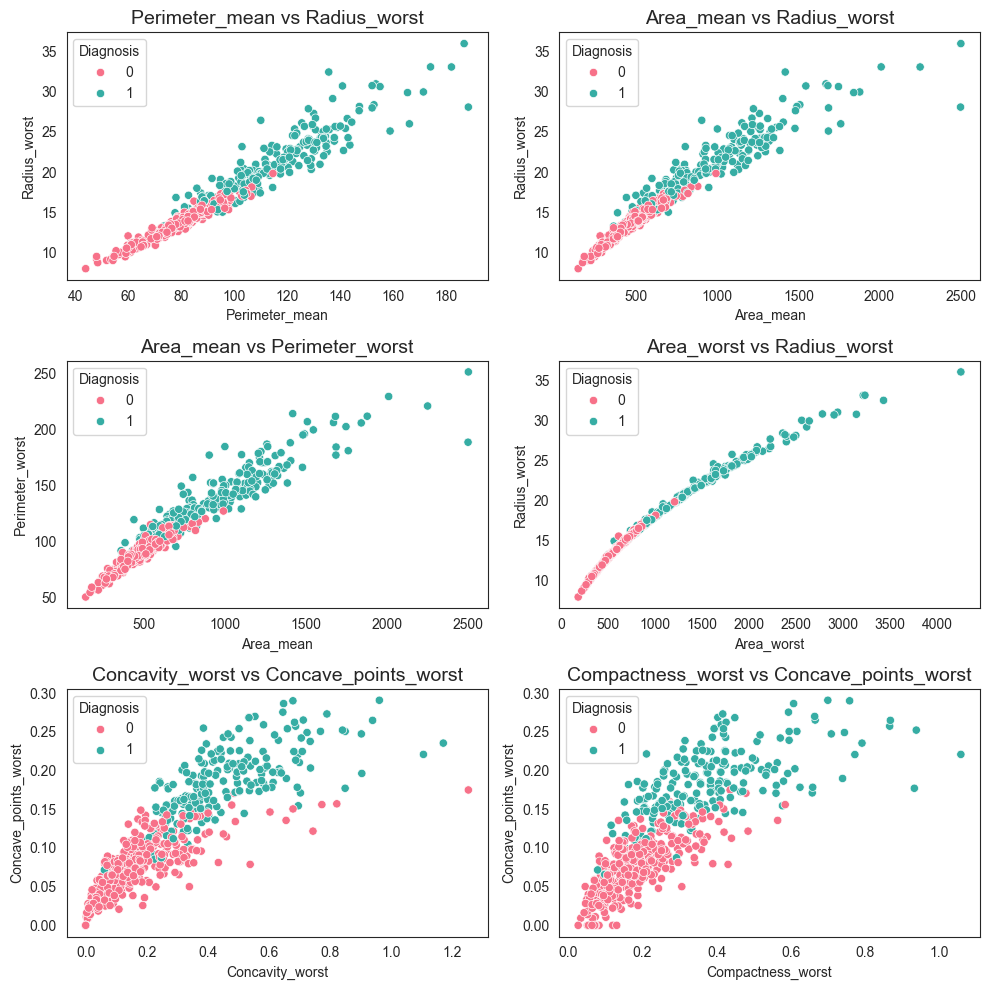

In [27]:
Positive_feature_pairs = [
    ('Perimeter_mean', 'Radius_worst'), 
    ('Area_mean', 'Radius_worst'), 
    ('Area_mean', 'Perimeter_worst'), 
    ('Area_worst', 'Radius_worst'),
    ('Concavity_worst', 'Concave_points_worst'),
    ('Compactness_worst', 'Concave_points_worst')
]

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.set_style('whitegrid')
sns.set_palette('husl', n_colors=2)

for (a, b), ax in zip(Positive_feature_pairs, axes.ravel()):
    sns.scatterplot(x=a, y=b, data=data, hue='Diagnosis', ax=ax)
    ax.set_title(f'{a} vs {b}', fontsize=14)

plt.tight_layout()
plt.show()

### 2.2.2 Negatively Correlated Features 

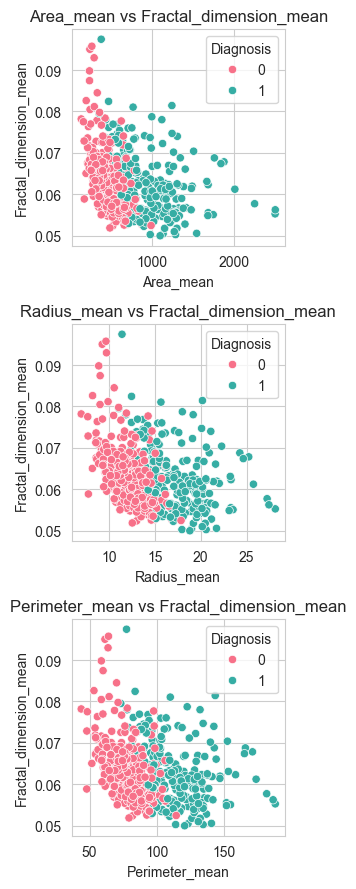

In [28]:
negative_feature_pairs = [
    ('Area_mean', 'Fractal_dimension_mean'),
    ('Radius_mean', 'Fractal_dimension_mean'),
    ('Perimeter_mean', 'Fractal_dimension_mean'),
]

fig, axes = plt.subplots(3, 1, figsize=(3, 9))
sns.set_style('whitegrid')
sns.set_palette('husl', n_colors=2)

for (a, b), ax in zip(negative_feature_pairs, axes.ravel()):
    sns.scatterplot(x=a, y=b, data=data, hue='Diagnosis', ax=ax)
    ax.set_title(f'{a} vs {b}', fontsize=12)

plt.tight_layout()
plt.show()

### 2.2.3 Un-Correlated Features

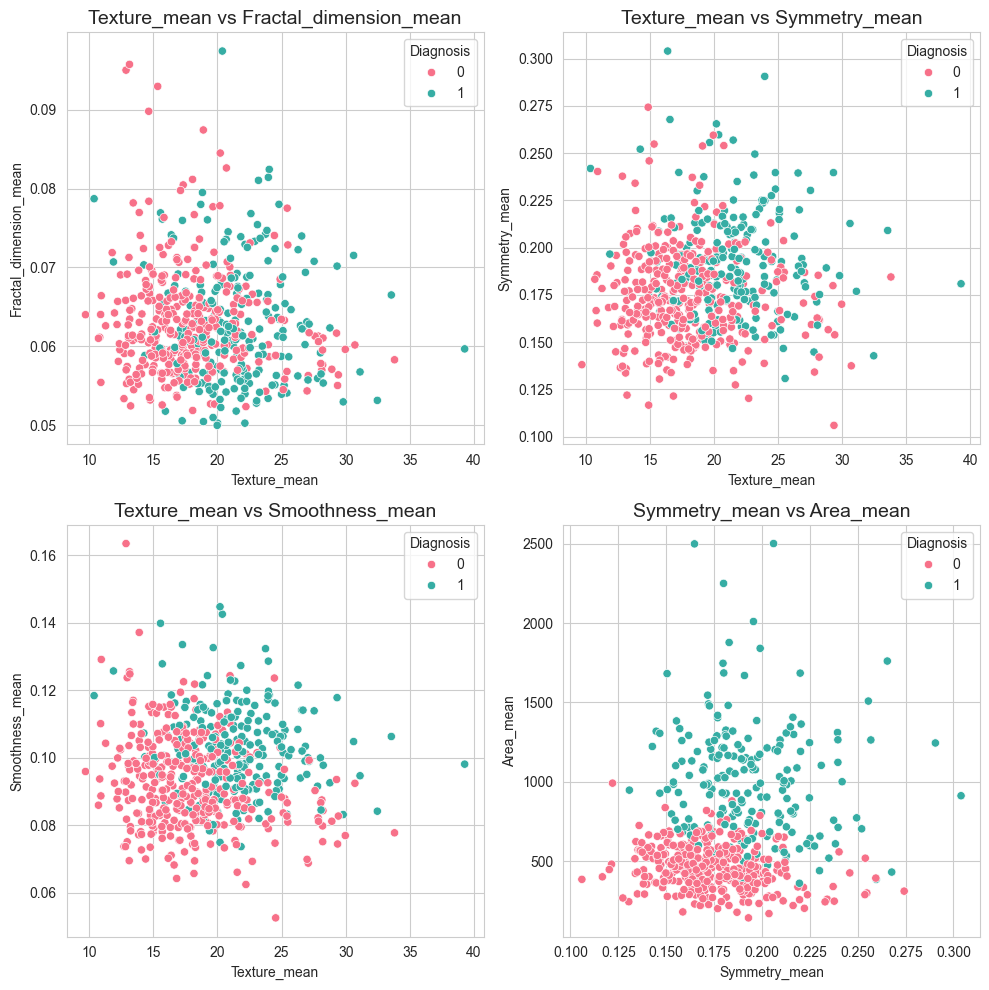

In [29]:
uncorrelated_feature_pairs = [
   ('Texture_mean', 'Fractal_dimension_mean'),
   ('Texture_mean', 'Symmetry_mean'),
   ('Texture_mean', 'Smoothness_mean'),
   ('Symmetry_mean', 'Area_mean'),

]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.set_style('whitegrid')
sns.set_palette('husl', n_colors=2)

for (a, b), ax in zip(uncorrelated_feature_pairs, axes.ravel()):
    sns.scatterplot(x=a, y=b, data=data, hue='Diagnosis', ax=ax)
    ax.set_title(f'{a} vs {b}', fontsize=14)

plt.tight_layout()
plt.show()

## 3. Data Processing

In [30]:
data.describe()

Diagnosis  Radius_mean  Texture_mean  Perimeter_mean    Area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       Symmetry_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        Area_worst  Smoothness_worst  Compactness_worst  Concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       Concave_points_worst  Symmetry_worst  Fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### 3.1 Statistical Analysis: Outlier Detection

####  3.1.1 Statistical Summary (IQR Method)

In [31]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print('Outliers:', outliers.sum())

Outliers: Diagnosis                   0
Radius_mean                14
Texture_mean                7
Perimeter_mean             13
Area_mean                  25
Smoothness_mean             6
Compactness_mean           16
Concavity_mean             18
Concave_points_mean        10
Symmetry_mean              15
Fractal_dimension_mean     15
Radius_se                  38
Texture_se                 20
Perimeter_se               38
Area_se                    65
Smoothness_se              30
Compactness_se             28
Concavity_se               22
Concave_points_se          19
Symmetry_se                27
Fractal_dimension_se       28
Radius_worst               17
Texture_worst               5
Perimeter_worst            15
Area_worst                 35
Smoothness_worst            7
Compactness_worst          16
Concavity_worst            12
Concave_points_worst        0
Symmetry_worst             23
Fractal_dimension_worst    24
dtype: int64


#### 3.1.2 Z-Scores

Calculate how many standard deviations a value is from the mean:

$$ Z = \frac{x - \mu}{\sigma} $$
​
 - Outliers are typically defined as points with |Z| > 3



In [32]:
from scipy.stats import zscore

z_scores = zscore(data)
outliers = (abs(z_scores) > 3 ).sum(axis=0)
print('Outliers:', outliers)

outlier_rows = (abs(z_scores) > 3).any(axis=1)
print(f"Number of rows with outliers: {outlier_rows.sum()}")

outlier_data = data[outlier_rows]

print(outlier_data['Diagnosis'].value_counts())

outlier_percentage = (abs(z_scores) > 3).any(axis=1).mean() * 100
print(f"Outliers as % of data: {outlier_percentage:.2f}%")


Outliers: [ 0  5  4  7  8  5  9  9  6  5  7  7  9  8  6  7 12  6  6 11 10  6  4  6
 10  3 10  7  0  9  9]
Number of rows with outliers: 74
Diagnosis
1    49
0    25
Name: count, dtype: int64
Outliers as % of data: 13.01%


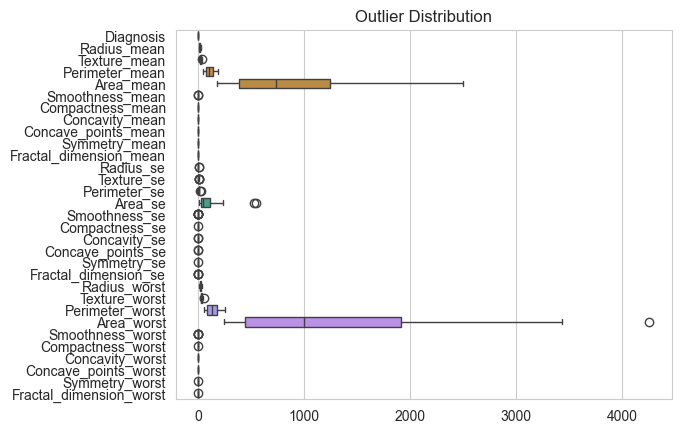

In [33]:
sns.boxplot(data = outlier_data, orient='h', palette='husl')
plt.title('Outlier Distribution')
plt.show()

> Most features show few or no outliers
>
> **Area_mean, Area_worstm Perimeter_mean and Perimeter_worst** exhibit the highest values.

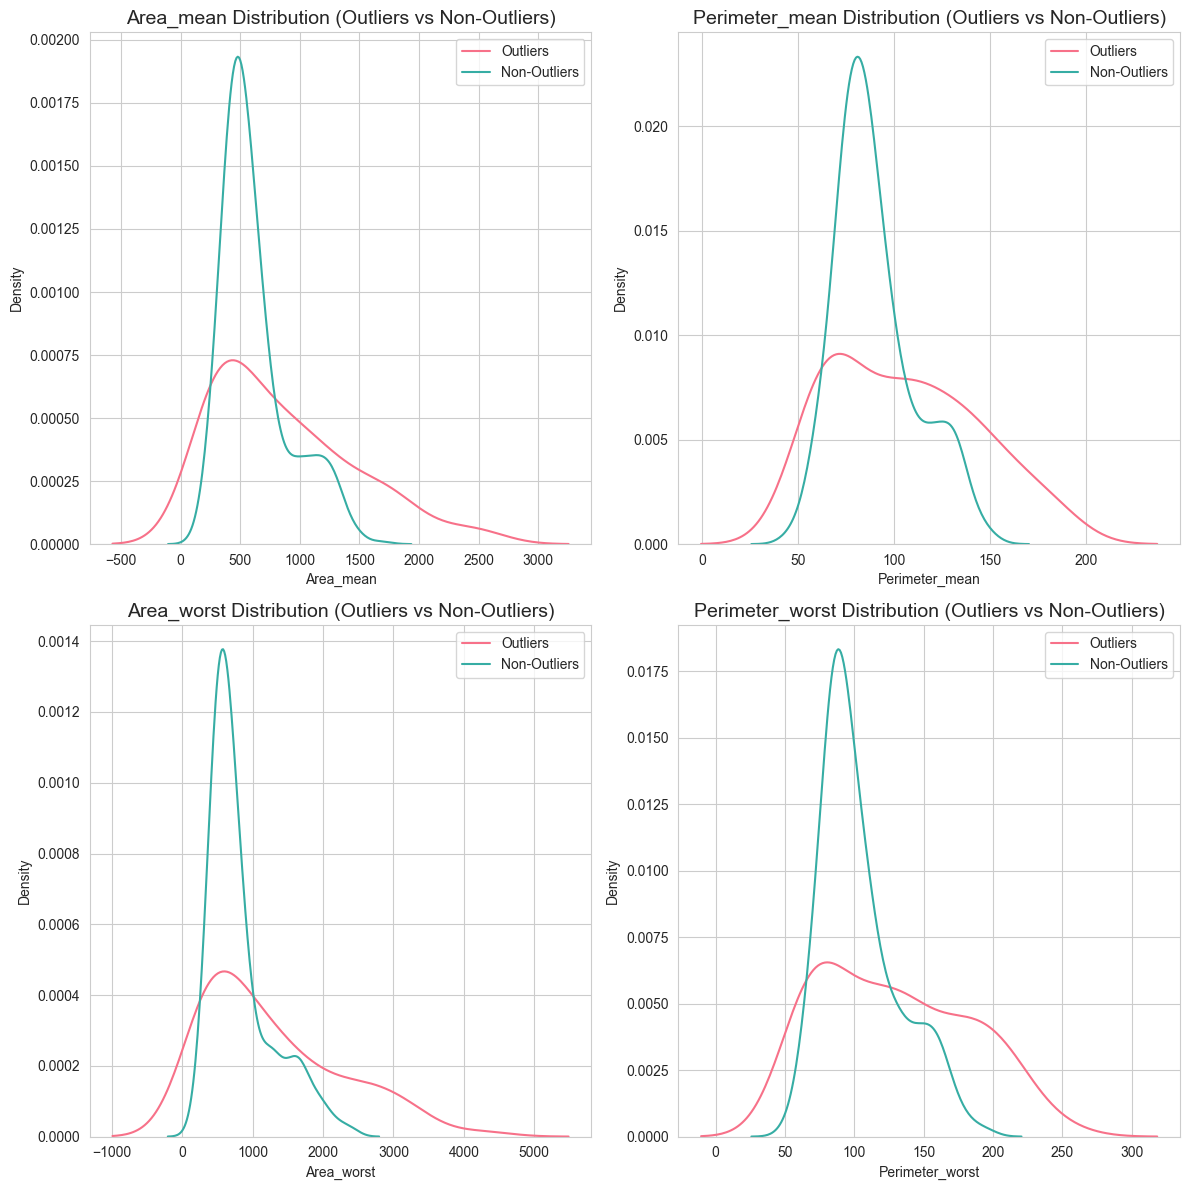

In [34]:
outliers = ['Area_mean', 'Perimeter_mean', 'Area_worst', 'Perimeter_worst']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for feature, ax in zip(outliers, axes.ravel()):
    sns.kdeplot(data=outlier_data[feature], label='Outliers', ax=ax)
    sns.kdeplot(data=data.loc[~outlier_rows, feature], label='Non-Outliers', ax=ax)
    ax.set_title(f'{feature} Distribution (Outliers vs Non-Outliers)', fontsize=14,)
    ax.legend()

plt.tight_layout()
plt.show()

> There is significant overlap between the distributions of outliers and non-outliers, suggesting that the outliers are not entirely isolated but rather represent extreme yet valid cases. 
>
> These outliers may contain critical information required for tumour classification and are therefore retained.


### 3.2 Feature Standardization

In [35]:
X = data.drop('Diagnosis', axis=1)  # features
y = data['Diagnosis']               # target values

In [36]:
# Standardize features:
scaler = StandardScaler()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Means of scaled features: \n', X_train.mean(axis=0))
print('Standard deviations of scaled features: \n', X_train.std(axis=0))

Means of scaled features: 
 [-3.16230558e-16 -3.51367287e-17 -1.13218348e-16  3.66983611e-16
 -2.38148939e-16 -4.29448906e-17 -5.95372347e-17  2.22532615e-16
  1.44450996e-16  5.05578485e-16  9.56499837e-17  7.02734574e-17
  2.83045870e-16  6.24652955e-17 -7.80816193e-18 -1.52259158e-16
  2.14724453e-17 -2.14724453e-16 -1.91299967e-16  2.24484656e-16
 -7.02734574e-17 -6.75406007e-16 -2.92806072e-17  1.81539765e-16
 -1.56163239e-17 -2.24972666e-16 -7.61295788e-17 -8.19857003e-17
  5.15338687e-16  2.14724453e-17]
Standard deviations of scaled features: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


### 3.3 Feature Decomposition using Principal Component Analysis (PCA)

Explained variance ratio: [0.43502782 0.63002788 0.72784307 0.79270717 0.84524094 0.88636894
 0.90872484 0.92520437 0.93900488 0.95105751 0.96162316 0.97045804
 0.97818188 0.98349877 0.98639913 0.98914777 0.99116898 0.9929821
 0.99461913 0.99565834 0.99665687 0.9975357  0.99834552 0.99892219
 0.99941849 0.99969478 0.99992059 0.99997136 0.99999594 1.        ]


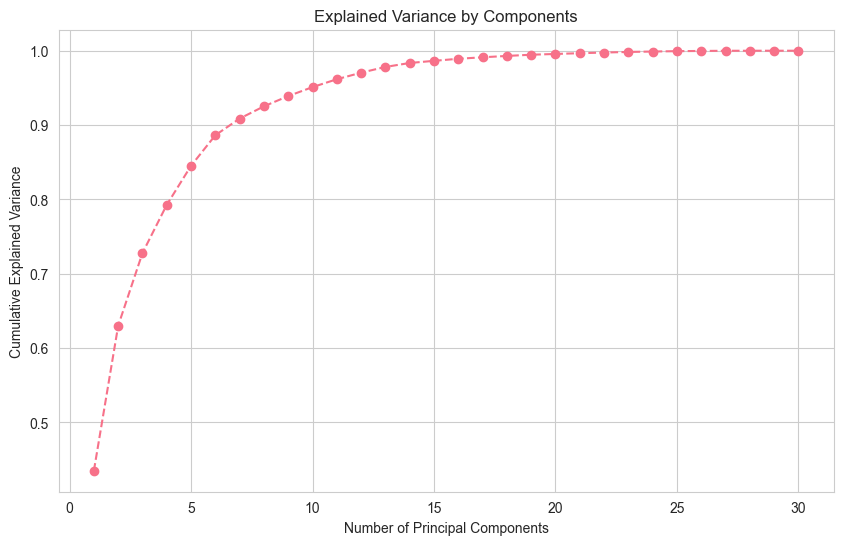

In [37]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print('Explained variance ratio:', cumulative_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

>The first 5 components capture ~95% of the variance.
>
> Beyond 10 components, the curve flattens, indicating that additional components add minimal information.

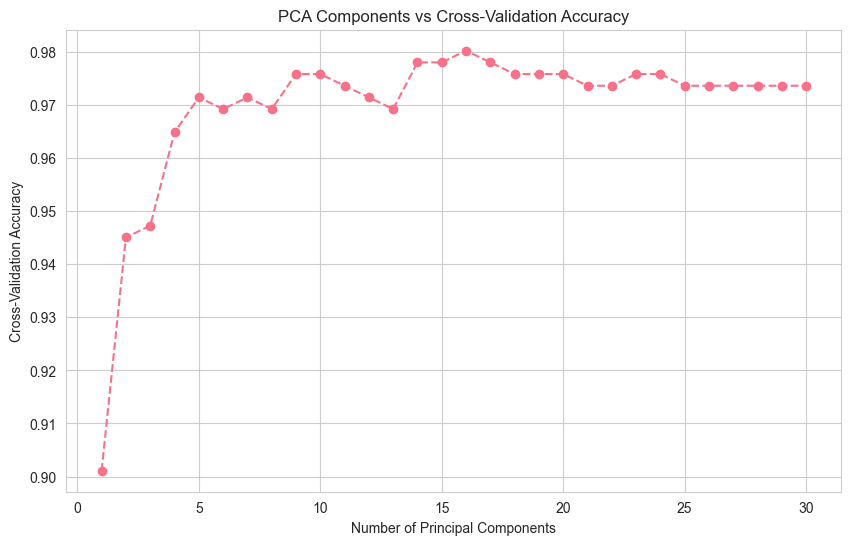

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cv_scores = []
num_components_range = range(1, len(cumulative_variance) + 1)

for n_components in num_components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)


    model = LogisticRegression(random_state=42, max_iter=1000)
    scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(num_components_range, cv_scores, marker='o', linestyle='--')
plt.title('PCA Components vs Cross-Validation Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validation Accuracy')

plt.show()

> Accuracy peaks aat ~16 components. 
>
> Accuracy stabalizes around ~ 0.978 after 16 components, and shows minimal improvement with additional PCs. 
>
> Based on this, 16 PCs will be retained 

In [41]:
pca = PCA(n_components=16)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Shape of X_train after PCA:', X_train_pca.shape)
print('Shape of X_test after PCA:', X_test_pca.shape)

Shape of X_train after PCA: (455, 16)
Shape of X_test after PCA: (114, 16)


## 4. Train and Evaluate Classification Algorithms

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel='linear', random_state=42),
    "Kernel SVM": SVC(kernel='rbf', random_state=42),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = []
for model_name, model in models.items():
    # fit the model
    model.fit(X_train_pca, y_train)
    # test the model
    y_pred = model.predict(X_test_pca)
    
    # evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Percision": clf_report['weighted avg']['precision'],
        "Recall": clf_report['weighted avg']['recall'],
        "F1 Score": clf_report['weighted avg']['f1-score'],
        "Confusion Matrix": confusion
    })

results_df = pd.DataFrame(results)
print(results_df[['Model', 'Accuracy', 'Percision', 'Recall', 'F1 Score']])    

                 Model  Accuracy  Percision    Recall  F1 Score
0  Logistic Regression  0.991228   0.991350  0.991228  0.991207
1  k-Nearest Neighbors  0.956140   0.956088  0.956140  0.956036
2         SVM (Linear)  0.982456   0.982456  0.982456  0.982456
3           Kernel SVM  0.982456   0.982937  0.982456  0.982369
4          Naïve Bayes  0.921053   0.921213  0.921053  0.920443
5        Decision Tree  0.956140   0.956488  0.956140  0.956237
6        Random Forest  0.964912   0.964912  0.964912  0.964912


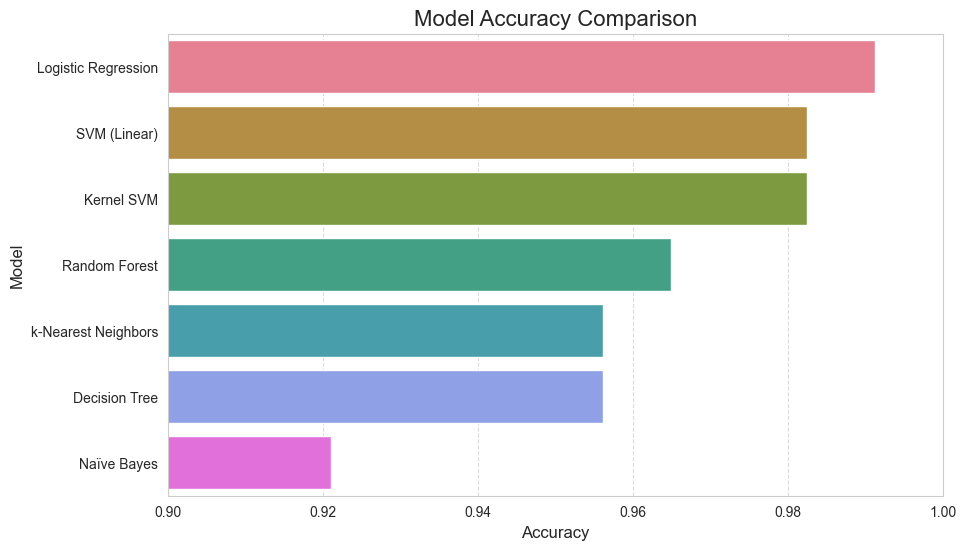

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort results by accuracy for better visualization
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Bar chart for model accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df_sorted, palette="husl")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0.9, 1)  # Optional: Adjust x-axis range if all accuracies are high
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
